<h1 style="text-align: center;"><br>Image Classification with CNN<br><br>Cat-Dog Classification Project<br><h1>

# Dataset Info

The Dogs vs. Cats dataset is a common computer vision dataset in which pictures are classified as either including a dog or a cat.

After the dataset is well studied, it can be used to understand and practice how to design, evaluate, and apply convolutional neural networks for image classification.

You will build a classifier with images and try to detect dogs versus cats using CNN.

Train set includes 12500 cat-5026 dog images, validation set includes 1219 cat-1071 dog images and test set includes 6897 cat and dogs images together. 

# Import Libraries and Export Images from Zip_File

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

#import warnings
#warnings.filterwarnings("ignore")
#warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

# Recognizing and Understanding Data

In [2]:
!gdown --id 1Qm7Lp95C9E9mqUD1m8LNf_UkfctXvEGB

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1Qm7Lp95C9E9mqUD1m8LNf_UkfctXvEGB
To: /content/cat_dog_data.zip
100% 595M/595M [00:02<00:00, 237MB/s]


In [3]:
import zipfile
with zipfile.ZipFile("cat_dog_data.zip", 'r') as zip:
 # printing all the contents of the zip file 
   zip.printdir()
 # extracting all the files 
   print('Extracting all the files now...') 
   zip.extractall() 
   print('Done!')

Görüntülenen çıkış son 5000 satıra kısaltıldı.
data/train/cat/cat.5734.jpg                    2021-10-25 12:07:30        27962
data/train/cat/cat.5789.jpg                    2021-10-25 12:08:08        34375
data/train/cat/cat.11181.jpg                   2021-10-25 11:20:56        30736
data/train/cat/cat.9089.jpg                    2021-10-25 12:35:34        25111
data/train/cat/cat.3316.jpg                    2021-10-25 11:47:40        20418
data/train/cat/cat.5193.jpg                    2021-10-25 12:02:42         9324
data/train/cat/cat.7184.jpg                    2021-10-25 12:19:12         5220
data/train/cat/cat.5659.jpg                    2021-10-25 12:06:42        26791
data/train/cat/cat.8066.jpg                    2021-10-25 12:26:14        17122
data/train/cat/cat.6040.jpg                    2021-10-25 12:10:18        17624
data/train/cat/cat.7276.jpg                    2021-10-25 12:19:56        16134
data/train/cat/cat.4078.jpg                    2021-10-25 11:53:34       

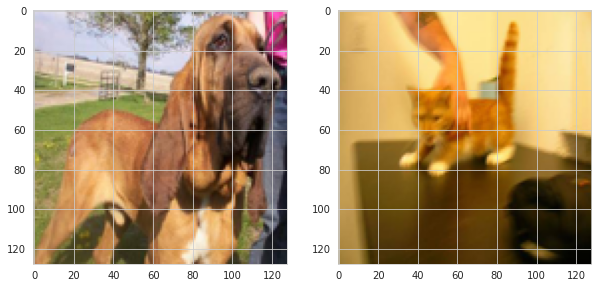

In [4]:
from PIL import Image

plt.subplot(1,2,1)
image = Image.open('data/train/dog/2462.jpg').resize((128,128))
plt.imshow(image)
plt.subplot(1,2,2)
image = Image.open('data/train/cat/cat.0.jpg').resize((128,128))
plt.imshow(image)

# Data Preprocessing

In [5]:
# from PIL import Image
# import os
# dog_list = os.listdir('data/train/dog')
# X_train = np.zeros(shape=(1,128,128,3))
# y_train = []
# for i in dog_list:
#   image = Image.open(f'data/train/dog/{i}').resize((128,128))
#   image = np.expand_dims(image,0)
#   X_train = np.append(X_train,image,axis=0)
#   y_train.append(1)
# X_train = np.delete(X_train, 0 ,axis=0)

# cat_list = os.listdir('data/train/cat')
# for i in cat_list:
#   image = Image.open(f'data/train/cat/{i}').resize((128,128))
#   image = np.expand_dims(image,0)
#   X_train = np.append(X_train,image,axis=0)
#   y_train.append(0)


In [6]:
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory
dir_train = 'data/train'
train = tf.keras.utils.image_dataset_from_directory(directory = dir_train,labels='inferred',
    label_mode='int',batch_size= 32,image_size=(64, 64))

dir_validation = 'data/validation'
validation = tf.keras.utils.image_dataset_from_directory(directory = dir_validation,labels='inferred',
    label_mode='int',batch_size= 32,image_size=(64, 64))

Found 17526 files belonging to 2 classes.
Found 2290 files belonging to 2 classes.


In [7]:
for image_batch, labels_batch in train:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 64, 64, 3)
(32,)


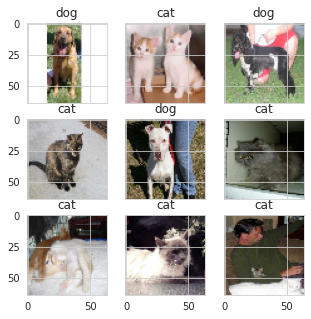

In [8]:
fig, ax = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(5,5))
 
for images, labels in train.take(1):
    for i in range(3):
        for j in range(3):
            ax[i][j].imshow(images[i*3+j].numpy().astype("uint8"))
            ax[i][j].set_title(train.class_names[labels[i*3+j]])
plt.show()

# Image Manipulation

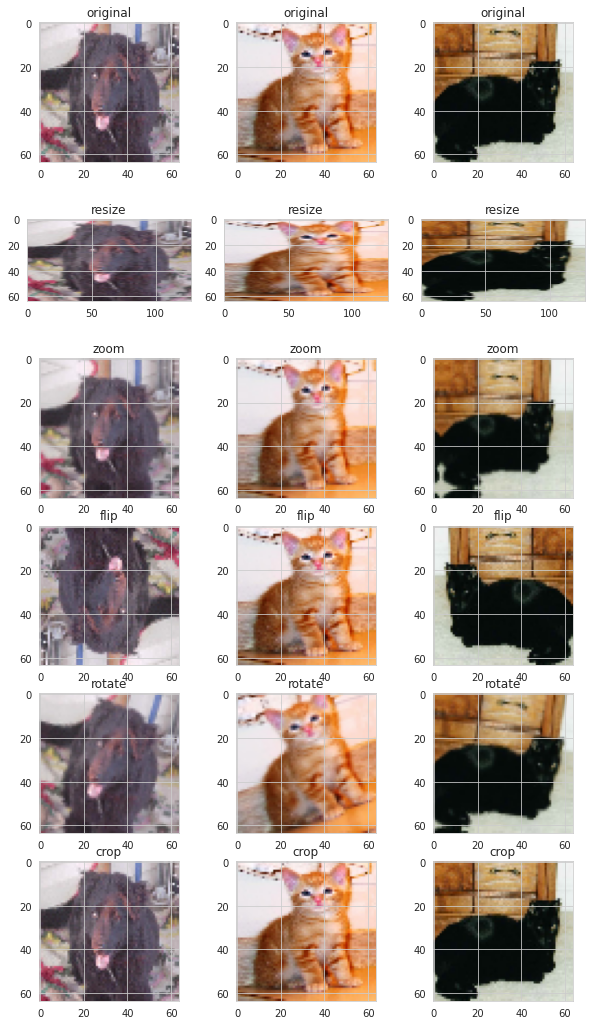

In [9]:
resize = tf.keras.layers.Resizing(64, 128)
zoom = tf.keras.layers.RandomZoom(0.3,0.3)
flip = tf.keras.layers.RandomFlip("horizontal_and_vertical") # or "horizontal", "vertical"
rotate = tf.keras.layers.RandomRotation(0.2)
crop = tf.keras.layers.RandomCrop(64, 64)


fig, ax = plt.subplots(6, 3, figsize=(10,18))
 
for images, labels in train.take(2):
    for i in range(3):
        # original
        ax[0][i].imshow(images[i].numpy().astype("uint8"))
        ax[0][i].set_title("original")
        # resize
        ax[1][i].imshow(resize(images[i]).numpy().astype("uint8"))
        ax[1][i].set_title("resize")
        # zoom
        ax[2][i].imshow(zoom(images[i]).numpy().astype("uint8"))
        ax[2][i].set_title("zoom")
        # flip
        ax[3][i].imshow(flip(images[i]).numpy().astype("uint8"))
        ax[3][i].set_title("flip")
        # rotate
        ax[4][i].imshow(rotate(images[i]).numpy().astype("uint8"))
        ax[4][i].set_title("rotate")
        # crop
        ax[5][i].imshow(crop(images[i]).numpy().astype("uint8"))
        ax[5][i].set_title("crop")
      

plt.show()

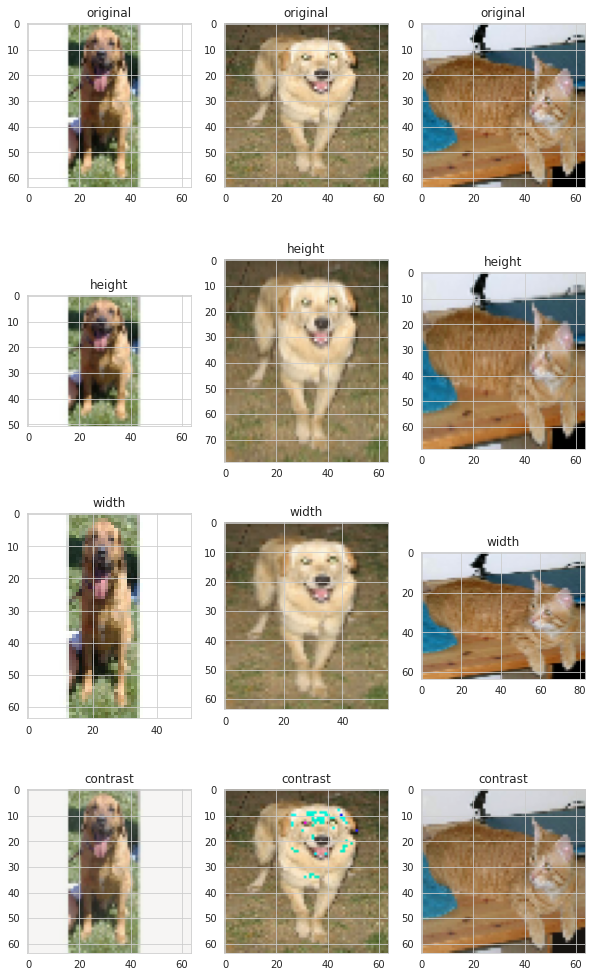

In [10]:
height = tf.keras.layers.RandomHeight(0.3)
width = tf.keras.layers.RandomWidth(0.3)# translation = tf.keras.layers.RandomTranslation(height_factor=0.2, width_factor=0.2)
# brightness = tf.keras.layers.RandomBrightness([-0.8,0.8])
contrast = tf.keras.layers.RandomContrast(0.2)
 
fig, ax = plt.subplots(4, 3, figsize=(10,18))
 
for images, labels in train.take(2):
    for i in range(3):
        # original
        ax[0][i].imshow(images[i].numpy().astype("uint8"))
        ax[0][i].set_title("original")
        # height
        ax[1][i].imshow(height(images[i]).numpy().astype("uint8"))
        ax[1][i].set_title("height")
        # width
        ax[2][i].imshow(width(images[i]).numpy().astype("uint8"))
        ax[2][i].set_title("width")
        # contrast
        ax[3][i].imshow(contrast(images[i]).numpy().astype("uint8"))
        ax[3][i].set_title("contrast")

      

plt.show()

# Rescaling

In [11]:
#1. Rescale code
# normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)
# normalized_train = train.map(lambda x, y: (normalization_layer(x), y))
# image_batch, labels_batch = next(iter(normalized_train))
# first_image = image_batch[0]
# print(np.min(first_image), np.max(first_image)) 

#2. Rescale code
AUTOTUNE = tf.data.AUTOTUNE
train = train.cache().prefetch(buffer_size=AUTOTUNE)
validation = validation.cache().prefetch(buffer_size=AUTOTUNE)

# The other one is in the Sequential function we use tf.keras.layers.experimental.preprocessing.Rescaling(1./255).
#   with fit data, it rescaling automatically

# Modelling

# 1st Model

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, RandomZoom, RandomFlip,RandomRotation,RandomCrop, Resizing
from tensorflow.keras.callbacks import EarlyStopping

dir_train = 'data/train'
train = tf.keras.utils.image_dataset_from_directory(directory = dir_train,labels='inferred',
    label_mode='binary',batch_size= 32,image_size=(64, 64))

dir_validation = 'data/validation'
validation = tf.keras.utils.image_dataset_from_directory(directory = dir_validation,labels='inferred',
    label_mode='binary',batch_size= 32,image_size=(64, 64))

model = Sequential([tf.keras.layers.Rescaling(1/255.0, offset=1)])

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation = "sigmoid"))

model.compile(loss='binary_crossentropy',optimizer='RMSprop', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights = True)
model.fit(train, epochs=10, validation_data=validation,callbacks=[early_stop])

Found 17526 files belonging to 2 classes.
Found 2290 files belonging to 2 classes.
Epoch 1/10
548/548 [==============================] - 18s 31ms/step - loss: 0.6054 - accuracy: 0.7131 - val_loss: 0.9269 - val_accuracy: 0.5432
Epoch 2/10
548/548 [==============================] - 19s 34ms/step - loss: 0.5238 - accuracy: 0.7520 - val_loss: 0.6564 - val_accuracy: 0.6314
Epoch 3/10
548/548 [==============================] - 17s 31ms/step - loss: 0.4847 - accuracy: 0.7726 - val_loss: 0.5593 - val_accuracy: 0.7223
Epoch 4/10
548/548 [==============================] - 17s 31ms/step - loss: 0.4599 - accuracy: 0.7893 - val_loss: 0.5208 - val_accuracy: 0.7476
Epoch 5/10
548/548 [==============================] - 17s 31ms/step - loss: 0.4370 - accuracy: 0.7992 - val_loss: 0.5690 - val_accuracy: 0.7253
Epoch 6/10
548/548 [==============================] - 17s 31ms/step - loss: 0.4161 - accuracy: 0.8139 - val_loss: 0.5853 - val_accuracy: 0.7140
Epoch 7/10
548/548 [==============================] -

# 2nd Model

In [16]:
model = Sequential([tf.keras.layers.Rescaling(1/255.0, offset=1)])

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation = "sigmoid"))

model.compile(loss='binary_crossentropy',optimizer='RMSprop', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights = True)
model.fit(train, epochs=10, validation_data=validation,callbacks=[early_stop])

Epoch 1/10
548/548 [==============================] - 19s 33ms/step - loss: 0.6088 - accuracy: 0.7118 - val_loss: 0.6726 - val_accuracy: 0.5323
Epoch 2/10
548/548 [==============================] - 17s 31ms/step - loss: 0.5350 - accuracy: 0.7426 - val_loss: 0.6182 - val_accuracy: 0.6568
Epoch 3/10
548/548 [==============================] - 17s 31ms/step - loss: 0.4760 - accuracy: 0.7797 - val_loss: 0.5049 - val_accuracy: 0.7568
Epoch 4/10
548/548 [==============================] - 18s 33ms/step - loss: 0.4366 - accuracy: 0.7998 - val_loss: 0.5765 - val_accuracy: 0.7197
Epoch 5/10
548/548 [==============================] - 17s 31ms/step - loss: 0.4075 - accuracy: 0.8179 - val_loss: 0.6036 - val_accuracy: 0.7314
Epoch 6/10
548/548 [==============================] - 17s 31ms/step - loss: 0.3766 - accuracy: 0.8330 - val_loss: 0.5461 - val_accuracy: 0.7633
Epoch 7/10
548/548 [==============================] - 17s 31ms/step - loss: 0.3526 - accuracy: 0.8494 - val_loss: 0.4556 - val_accuracy:

# 3rd Model

In [17]:
model = Sequential([tf.keras.layers.Rescaling(1/255.0, offset=1)])


model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation = "sigmoid"))

model.compile(loss='binary_crossentropy',optimizer='RMSprop', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights = True)
model.fit(train, epochs=10, validation_data=validation,callbacks=[early_stop])

Epoch 1/10
548/548 [==============================] - 21s 32ms/step - loss: 0.6305 - accuracy: 0.7124 - val_loss: 0.7373 - val_accuracy: 0.5323
Epoch 2/10
548/548 [==============================] - 17s 31ms/step - loss: 0.5736 - accuracy: 0.7219 - val_loss: 0.6331 - val_accuracy: 0.6323
Epoch 3/10
548/548 [==============================] - 17s 32ms/step - loss: 0.5265 - accuracy: 0.7504 - val_loss: 0.6434 - val_accuracy: 0.6507
Epoch 4/10
548/548 [==============================] - 18s 32ms/step - loss: 0.4934 - accuracy: 0.7688 - val_loss: 0.5539 - val_accuracy: 0.7301
Epoch 5/10
548/548 [==============================] - 21s 38ms/step - loss: 0.4730 - accuracy: 0.7835 - val_loss: 0.6159 - val_accuracy: 0.6904
Epoch 6/10
548/548 [==============================] - 18s 32ms/step - loss: 0.4567 - accuracy: 0.7917 - val_loss: 0.5051 - val_accuracy: 0.7725
Epoch 7/10
548/548 [==============================] - 17s 31ms/step - loss: 0.4394 - accuracy: 0.8026 - val_loss: 0.5247 - val_accuracy:

# 4rd Model

In [20]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, RandomZoom, RandomFlip,RandomRotation,RandomCrop, Resizing

model = Sequential([tf.keras.layers.Rescaling(1/255.0, offset=1)])

model.add(RandomFlip("horizontal_and_vertical"))
model.add(RandomRotation(0.3))
model.add(RandomZoom(0.2,0.2))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation = "sigmoid"))

model.compile(loss='binary_crossentropy',optimizer='RMSprop', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights = True)
model.fit(train, epochs=10, validation_data=validation,callbacks=[early_stop])

Epoch 1/10
548/548 [==============================] - 21s 35ms/step - loss: 0.6153 - accuracy: 0.7114 - val_loss: 0.7678 - val_accuracy: 0.5323
Epoch 2/10
548/548 [==============================] - 19s 34ms/step - loss: 0.6022 - accuracy: 0.7132 - val_loss: 0.7581 - val_accuracy: 0.5323
Epoch 3/10
548/548 [==============================] - 20s 35ms/step - loss: 0.6007 - accuracy: 0.7132 - val_loss: 0.7490 - val_accuracy: 0.5323
Epoch 4/10
548/548 [==============================] - 19s 35ms/step - loss: 0.6002 - accuracy: 0.7132 - val_loss: 0.7588 - val_accuracy: 0.5323


# Final Model

In [21]:
model = Sequential([tf.keras.layers.Rescaling(1/255.0, offset=1)])

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation = "sigmoid"))

model.compile(loss='binary_crossentropy',optimizer='RMSprop', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights = True)
model.fit(train, epochs=20, validation_data=validation,callbacks=[early_stop])

Epoch 1/20
548/548 [==============================] - 18s 31ms/step - loss: 0.6023 - accuracy: 0.7129 - val_loss: 0.7363 - val_accuracy: 0.5402
Epoch 2/20
548/548 [==============================] - 23s 41ms/step - loss: 0.5359 - accuracy: 0.7417 - val_loss: 0.6529 - val_accuracy: 0.6096
Epoch 3/20
548/548 [==============================] - 22s 40ms/step - loss: 0.4799 - accuracy: 0.7762 - val_loss: 0.5434 - val_accuracy: 0.7354
Epoch 4/20
548/548 [==============================] - 17s 31ms/step - loss: 0.4412 - accuracy: 0.7956 - val_loss: 0.5640 - val_accuracy: 0.7266
Epoch 5/20
548/548 [==============================] - 18s 33ms/step - loss: 0.4128 - accuracy: 0.8165 - val_loss: 0.5039 - val_accuracy: 0.7681
Epoch 6/20
548/548 [==============================] - 17s 31ms/step - loss: 0.3826 - accuracy: 0.8332 - val_loss: 0.5163 - val_accuracy: 0.7694
Epoch 7/20
548/548 [==============================] - 17s 31ms/step - loss: 0.3524 - accuracy: 0.8453 - val_loss: 0.4880 - val_accuracy:

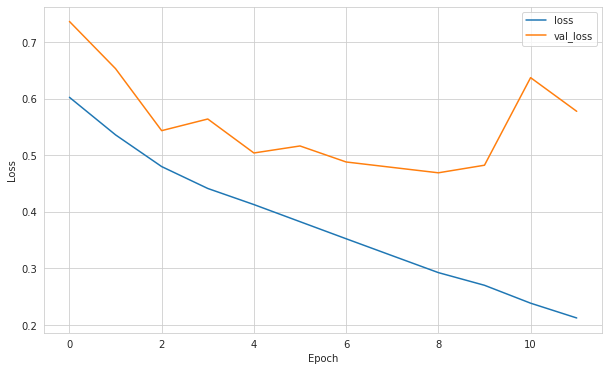

In [22]:
losses = pd.DataFrame(model.history.history)
plt.figure(figsize=(10,6))
plt.plot(losses.loss, label="loss")
plt.plot(losses.val_loss, label="val_loss")
plt.legend(loc="upper right")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

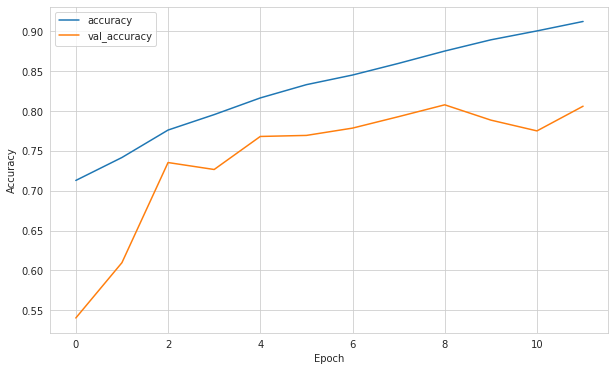

In [23]:
plt.figure(figsize=(10,6))
plt.plot(losses.accuracy, label="accuracy")
plt.plot(losses.val_accuracy, label="val_accuracy")
plt.legend(loc="upper left")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

In [24]:
score = model.evaluate(validation)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

72/72 [==============================] - 2s 24ms/step - loss: 0.4689 - accuracy: 0.8079
Test loss: 0.4689156711101532
Test accuracy: 0.807860255241394


In [25]:
dir_validation = 'data/validation'
validation = tf.keras.utils.image_dataset_from_directory(directory = dir_validation,labels='inferred',
    label_mode='binary',batch_size= 32,image_size=(64, 64), shuffle=False)
label = np.concatenate([label for x, label in validation], axis=0)
label

Found 2290 files belonging to 2 classes.


array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [26]:
# label = np.concatenate([label for x, label in validation], axis=0)
pred_probabilities = model.predict(validation)
predictions = pred_probabilities > 0.5
predictions

array([[False],
       [ True],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])

In [27]:
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(label,predictions))
print(classification_report(label,predictions))


[[1016  203]
 [ 237  834]]
              precision    recall  f1-score   support

         0.0       0.81      0.83      0.82      1219
         1.0       0.80      0.78      0.79      1071

    accuracy                           0.81      2290
   macro avg       0.81      0.81      0.81      2290
weighted avg       0.81      0.81      0.81      2290



In [28]:
from tensorflow.keras.models import load_model
model.save('cat_dog_cnn1.h5')

# Image Prediction

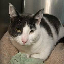

In [42]:
from PIL import Image
from tensorflow.keras.preprocessing import image

model=load_model('cat_dog_cnn1.h5')
img = image.load_img("data/test/10005.jpg", target_size=(64,64,3)) 
img   

In [43]:
img_array = np.array(img) 
img_array = np.expand_dims(img_array, axis=0)
img_array.shape

(1, 64, 64, 3)

In [44]:
model.predict(img_array) > 0.5

array([[False]])

In [45]:
validation.class_names

['cat', 'dog']